In [6]:
import pprint

In [5]:
text_data = [" AI and Machine Learning for Coders. By Laurence Moroney",
             "    Mathematics for Machine Learning. By Marc Peter Deisenroth",
             "  Linear Algebra and Optimization for Machine Learning By Charu C. Aggarwal"]

In [7]:
# Strip whitespaces

strip_whitespace = [string.strip() for string in text_data]
pprint.pprint(strip_whitespace)

['AI and Machine Learning for Coders. By Laurence Moroney',
 'Mathematics for Machine Learning. By Marc Peter Deisenroth',
 'Linear Algebra and Optimization for Machine Learning By Charu C. Aggarwal']


In [9]:
remove_periods = [string.replace(".", "") for string in strip_whitespace]
pprint.pprint(remove_periods)

['AI and Machine Learning for Coders By Laurence Moroney',
 'Mathematics for Machine Learning By Marc Peter Deisenroth',
 'Linear Algebra and Optimization for Machine Learning By Charu C Aggarwal']


In [ ]:
# Create function
def capitalizer(string: str) -> str:
    return string.upper

In [ ]:
# tokenizing text

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'Today is a sunny day',
    'Today is a rainy day'
]
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'today': 1, 'is': 2, 'a': 3, 'day': 4, 'sunny': 5, 'rainy': 6}


In [20]:
sentences = [
    'Today is a sunny day',
    'Today is a rainy day',
    'Is it sunny today?'
]

In [21]:
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'today': 1, 'is': 2, 'a': 3, 'day': 4, 'sunny': 5, 'rainy': 6, 'it': 7}


In [25]:
sentences = [
    'Today is a sunny day',
    'Today is a rainy day',
    'Is it sunny today?'
]
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
print('\n', sequences)

{'today': 1, 'is': 2, 'a': 3, 'sunny': 4, 'day': 5, 'rainy': 6, 'it': 7}

 [[1, 2, 3, 4, 5], [1, 2, 3, 6, 5], [2, 7, 4, 1]]


In [27]:
test_data = [
    'Today is a snowy day',
    'Will it be rainy tomorrow'
]

test_sequences = tokenizer.texts_to_sequences(test_data)
print(word_index)
print('\n', test_sequences)

{'today': 1, 'is': 2, 'a': 3, 'sunny': 4, 'day': 5, 'rainy': 6, 'it': 7}

 [[1, 2, 3, 5], [7, 6]]


In [29]:
# Out-of-vocabulary token
tokenizer = Tokenizer(num_words=100, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

test_sequences = tokenizer.texts_to_sequences(test_data)
print(word_index)
print(test_sequences)

{'<OOV>': 1, 'today': 2, 'is': 3, 'a': 4, 'sunny': 5, 'day': 6, 'rainy': 7, 'it': 8}
[[2, 3, 4, 1, 6], [1, 8, 1, 7, 1]]


In [6]:
import pprint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
pp = pprint.PrettyPrinter(indent=4)
sentences = [
    'Today is a sunny day',
    'Today is a rainy day',
    'Is it sunny today?',
    'I really enjoyed walking in the snow today'
]
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)

pp.pprint(sequences)


[[1, 2, 3, 4, 5], [1, 2, 3, 6, 5], [2, 7, 4, 1], [8, 9, 10, 11, 12, 13, 14, 1]]


In [15]:
# Encoding Text as a Bag of Words

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Create text
text_data = np.array(['I love Brazil. Brazil!',
                     'Sweden is best',
                     'Germany beats both'])

# Create the bag of words feature matrix
count = CountVectorizer()
bag_of_words = count.fit_transform(text_data)

# Show feature matrix
print(bag_of_words)

print('\n', bag_of_words.toarray())

  (0, 6)	1
  (0, 3)	2
  (1, 7)	1
  (1, 5)	1
  (1, 1)	1
  (2, 4)	1
  (2, 0)	1
  (2, 2)	1

 [[0 0 0 2 0 0 1 0]
 [0 1 0 0 0 1 0 1]
 [1 0 1 0 1 0 0 0]]


In [16]:
# Show feature names
count.get_feature_names()

['beats', 'best', 'both', 'brazil', 'germany', 'is', 'love', 'sweden']

In [52]:
# Reducing Features on Sparse Data

# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import numpy as np

array = bag_of_words.toarray()
print(array)
    
# Standardize feature matrix
tsvd = TruncatedSVD(n_components=5)
features_sparse_tsvd = tsvd.fit(array).transform(array)


[[0 0 0 2 0 0 1 0]
 [0 1 0 0 0 1 0 1]
 [1 0 1 0 1 0 0 0]]


In [43]:
print('Original number of features:', bag_of_words.shape[1])
print('Reduced number of features:', features_sparse_tsvd.shape[1])

Original number of features: 8
Reduced number of features: 3


array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>,
        <AxesSubplot:xlabel='3', ylabel='0'>,
        <AxesSubplot:xlabel='4', ylabel='0'>,
        <AxesSubplot:xlabel='5', ylabel='0'>,
        <AxesSubplot:xlabel='6', ylabel='0'>,
        <AxesSubplot:xlabel='7', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>,
        <AxesSubplot:xlabel='3', ylabel='1'>,
        <AxesSubplot:xlabel='4', ylabel='1'>,
        <AxesSubplot:xlabel='5', ylabel='1'>,
        <AxesSubplot:xlabel='6', ylabel='1'>,
        <AxesSubplot:xlabel='7', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>,
        <AxesSubplot:xlabel='3', ylabel='2'>,
        <AxesSubplot:xlabel='4', ylabel='2'>,
        <AxesSubplot:xlabel='5',

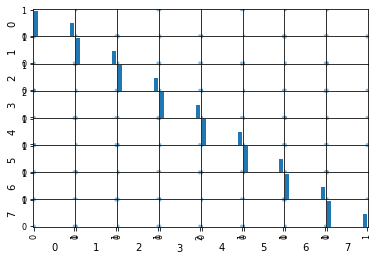

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data=array)
pd.plotting.scatter_matrix(df)